#EDA on Nationwide Russian Presidential Election Poll, 2024

**Dataset Description:**
This dataset comprises the results of a nationwide presidential election poll conducted on March 4, 2024. The
data offers various insights but does not align with the official election results.

##Data understanding & cleaning

###Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

###Load the data

In [2]:
df = pd.read_csv('/content/election2024.csv')
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


###Check the shape of Data

In [3]:
df.shape

(1600, 16)

This dataset has 1600 rows & 16 columns

###Checking non-null values and data types for each columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

As we can see, only two Columns have null values - 'job_type' and 'company_type'

In [5]:
df.rename(columns={'weight1': 'weight'}, inplace=True)

###Checking the statistical summary of the Dataset

In [6]:
df.describe()

,age,weight
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


**Insights**
- The age of respondents ranges from 18 to 90 years
- The average age is approximately 50 years, with a standard deviation of about 16.93 years.
- The median age of respondents is 49, indicating that half of the respondents are younger than 49, and half are older.


###Checking missing values

In [7]:
df.isna().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight                   0
dtype: int64

**Insights**
- There are significant missing values in the 'job_type' (908 missing) and 'company_type' (721 missing) columns.
- The missing values could suggest that respondents were either unwilling or unable to provide this information, or it wasn't applicable to a large portion of them.

###Checkinhg duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicate rows in the dataset, indicating that each record is unique.

###Checking the unique values

In [9]:
df.nunique()

id                     1600
sex                       2
age                      71
federal_district          8
type_of_city              7
knows_election_date       4
will_vote                 6
candidate                 7
television_usage          6
internet_usage            6
education                 6
income                    6
employment               11
job_type                  6
company_type             21
weight                  569
dtype: int64

**Insights**
- The dataset covers a diverse age range with 71 unique values, indicating a wide representation of different age groups.
- Employment status is highly varied with 11 distinct categories, suggesting a broad spectrum of occupational backgrounds among respondents.
- The 'weight1' variable has 569 unique values, reflecting a complex and varied weighting scheme applied to the survey data.

###Checking Numerical & Categorical columns

In [10]:
numeric_columns = [col for col in df.columns if df[col].dtype != 'O']
categorical_columns = [col for col in df.columns if df[col].dtype == 'O']

print(f'We have {len(numeric_columns)} numerical features : {numeric_columns}')
print(f'\nWe have {len(categorical_columns)} categorical features : {categorical_columns}')

We have 2 numerical features : ['age', 'weight']

We have 14 categorical features : ['id', 'sex', 'federal_district', 'type_of_city', 'knows_election_date', 'will_vote', 'candidate', 'television_usage', 'internet_usage', 'education', 'income', 'employment', 'job_type', 'company_type']


###checking unique valuse for few specific object columns

In [11]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight'],
      dtype='object')

In [12]:
##Temporarily drop few columns

df_temp = df.drop(columns=['id', 'sex', 'age', 'weight'])    ##No changes needed for the values in these columns
df_temp.head()

,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type
0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming
1,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade
2,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency
3,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN
4,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications"


In [13]:
object_columns = df_temp.select_dtypes(include=['object']).columns

for col in object_columns:
  print(f"{col} has {df_temp[col].unique()} values \n")

federal_district has ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern'] values 

type_of_city has ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k'] values 

knows_election_date has ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year'] values 

will_vote has ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer'] values 

candidate has ['Putin' 'Davankov' 'will not take part' 'spoilt vote' 'Kharitonov'
 'struggle to answer' 'Slutskiy'] values 

television_usage has ['several times a week' 'once half a year' 'does not watch'
 'less than 4 hours a day' 'over 4 hours a day' 'several times a month'] values 

internet_usage has ['over 4 hours a day' 'less than 4 hours a day' 'several times a week'
 'does not use in

Here we can see unique values for desired columns, so that we can make necessary changes to the actual DataFrame for better understanding

###Replacing some values to simplify the dataset

In [14]:
df['type_of_city'].replace(to_replace = {'city with population of less than 50k' : 'very small city',
                                       'city with population of 1 million and higher' : 'very big city',
                                       'city with population of 50-100k' : 'small city',
                                       'city with population of 100-500k' : 'medium city',
                                       'city with population of 500-950k' : 'big city'}, inplace = True)

df['will_vote'].replace(to_replace = {'definitely yes': 'yes',
                                   'likely yes': 'yes',
                                   'definitely no': 'no',
                                   'likely no': 'no',
                                   'struggle to answer': 'unsure'}, inplace = True)


df['television_usage'].replace(to_replace = {'several times a week': 'frequently',
                                         'several times a month': 'frequently',
                                         'less than 4 hours a day': 'less than 4 hours',
                                         'over 4 hours a day': 'more than 4 hours',
                                         'once half a year': 'rarely',
                                         'does not watch': 'does not watch'}, inplace = True)

df['internet_usage'].replace(to_replace = {'several times a week': 'frequently',
                                        'several times a month': 'frequently',
                                        'less than 4 hours a day': 'less than 4 hours',
                                        'less than 4 hours a day': 'less than 4 hours',
                                        'over 4 hours a day': 'more than 4 hours',
                                        'once half a year': 'rarely',
                                        'does not use internet': 'does not use internet'}, inplace = True)

###Checking value counts for each column

In [15]:
for col in df.columns:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("=======================================================")

Counts for id:
id
07169ed8148ce047    1
0716a8f7a98ceab4    1
0716968485ccea72    1
07167fa9264ceb65    1
07166778618ce822    1
                   ..
0716afc0a28cea87    1
07168fbd9d4ce53f    1
07167bd65a0ce094    1
07168f3957cce462    1
07168088318cef88    1
Name: count, Length: 1600, dtype: int64
Counts for sex:
sex
female    843
male      757
Name: count, dtype: int64
Counts for age:
age
40.0    46
37.0    46
45.0    45
38.0    44
39.0    39
        ..
86.0     4
85.0     4
87.0     3
81.0     3
90.0     1
Name: count, Length: 71, dtype: int64
Counts for federal_district:
federal_district
central            425
volga              324
siberian           188
southern           182
northwestern       151
ural               134
north caucasian    107
far eastern         89
Name: count, dtype: int64
Counts for type_of_city:
type_of_city
medium city        391
village            366
very big city      307
very small city    179
big city           170
small city         106
settlement     

##Visualizing & analyzing the data

###Chceking the Outliers for numeric columns

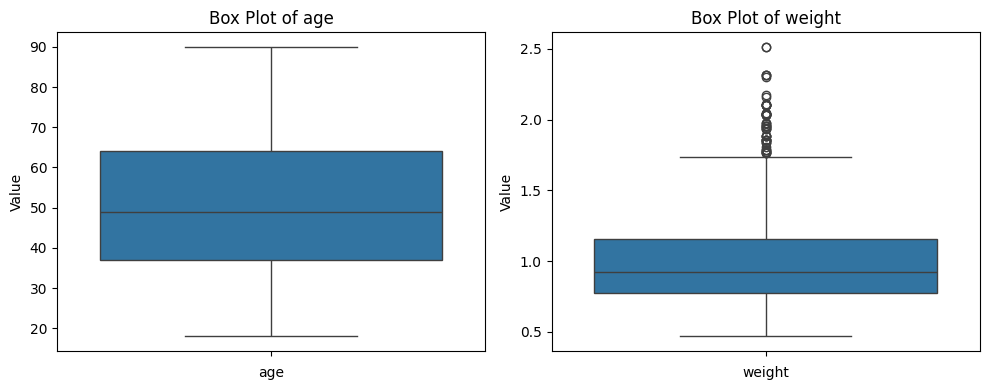

In [26]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

**Insights**
- For the 'age' column, there is no outliers
- for the 'weight' column, there are few outliers present


###Distribution of Numeric columns

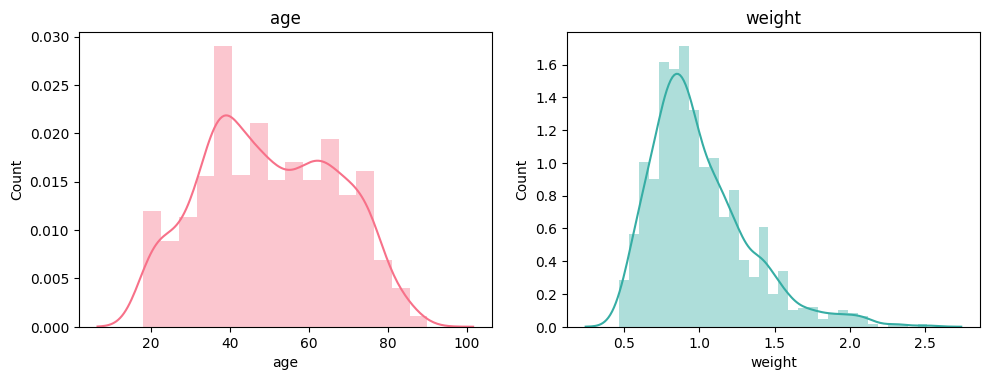

In [16]:
fig = plt.figure(figsize=(10,7))
colors = sns.color_palette("husl", len(numeric_columns))
for i in range(len(numeric_columns)):
    plt.subplot(2,2,i+1)
    sns.distplot(df[numeric_columns[i]], color=colors[i])
    plt.xlabel(numeric_columns[i])
    plt.ylabel('Count')
    plt.title(numeric_columns[i])
plt.tight_layout()

**Insights**
- age: The age of respondents is spread from 18 to 90, with a noticeable peak around the age of 35.

- weight:
1. In the context of this survey data, "weight" refers to a numerical factor used to adjust the results for better population representation. It's not a physical measurement but a scaling factor that corrects for survey design and non-response, ensuring each respondent's influence is appropriately balanced.
2. there's a noticeable peak around the value 1.0 with positive skewness

###Genderwise distribution

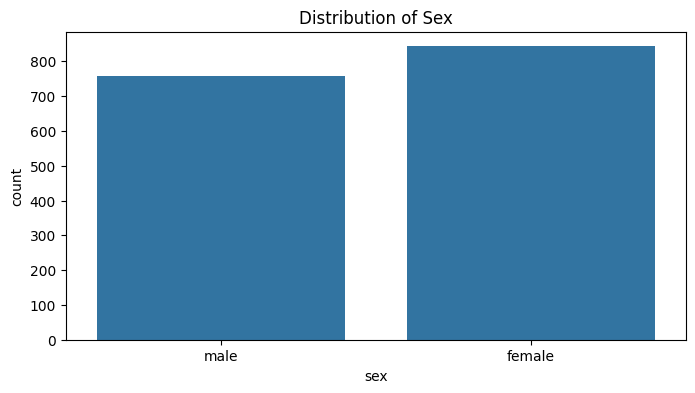

In [30]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='sex')
plt.title('Distribution of Sex')
plt.show()

**Insights**
- As we can see, number of female respondents are higher than male respondents

###Correlation Analysis

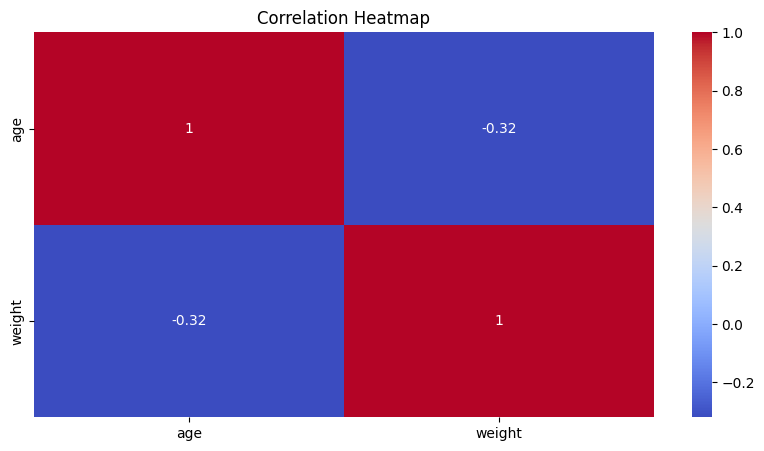

In [32]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[['age', 'weight']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

###Employment status and job type

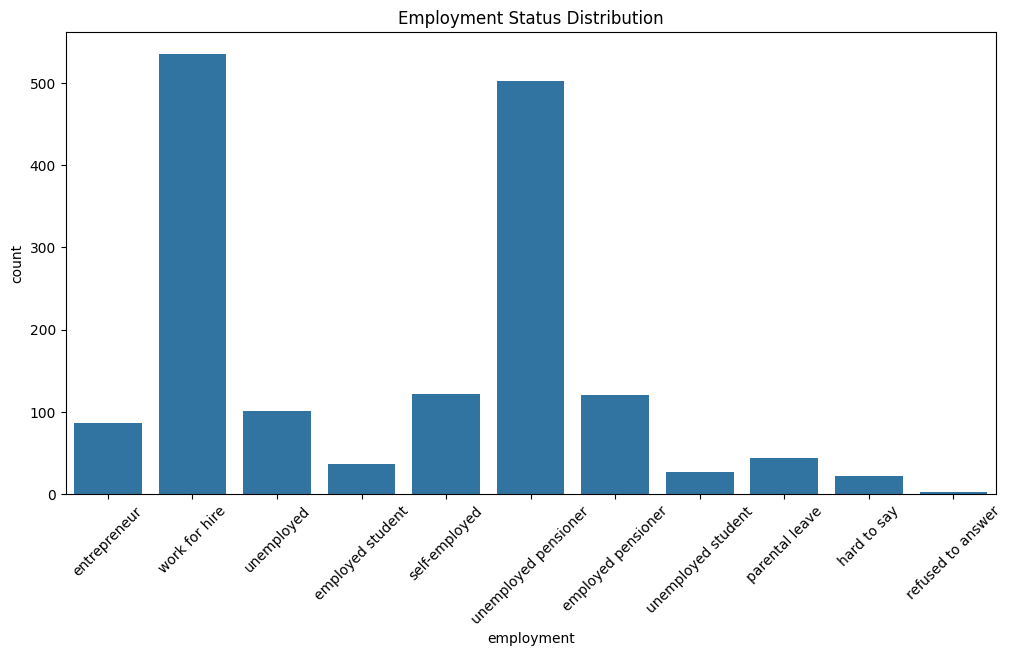

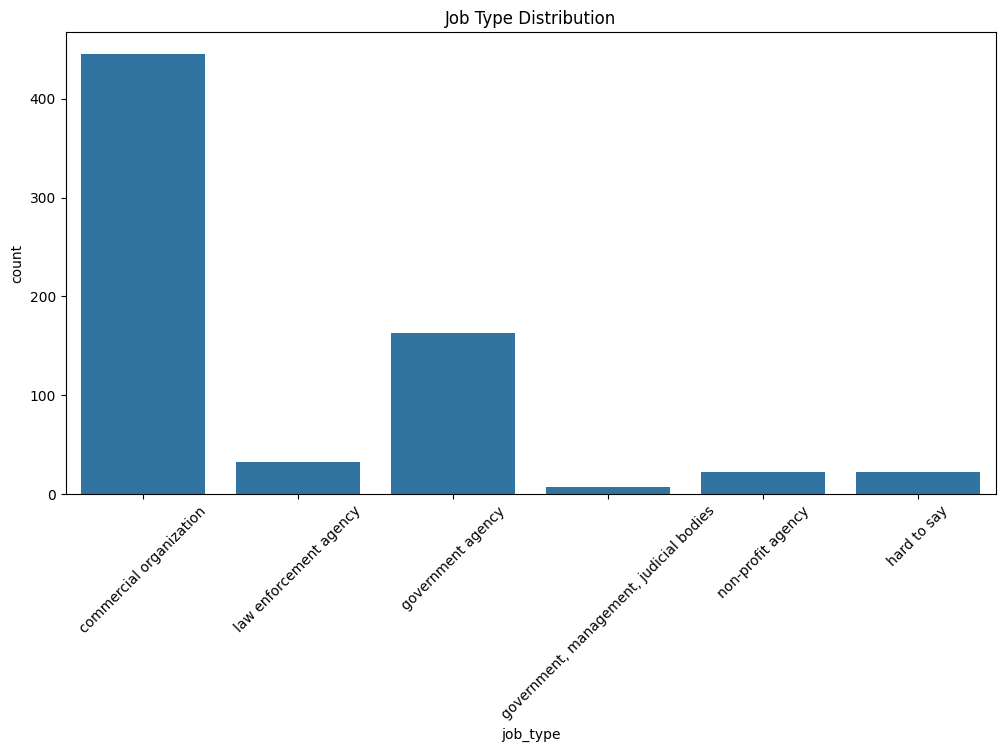

In [33]:
# Employment status distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='employment')
plt.title('Employment Status Distribution')
plt.xticks(rotation=45)
plt.show()

# Job type distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job_type')
plt.title('Job Type Distribution')
plt.xticks(rotation=45)
plt.show()

###Education and Income level

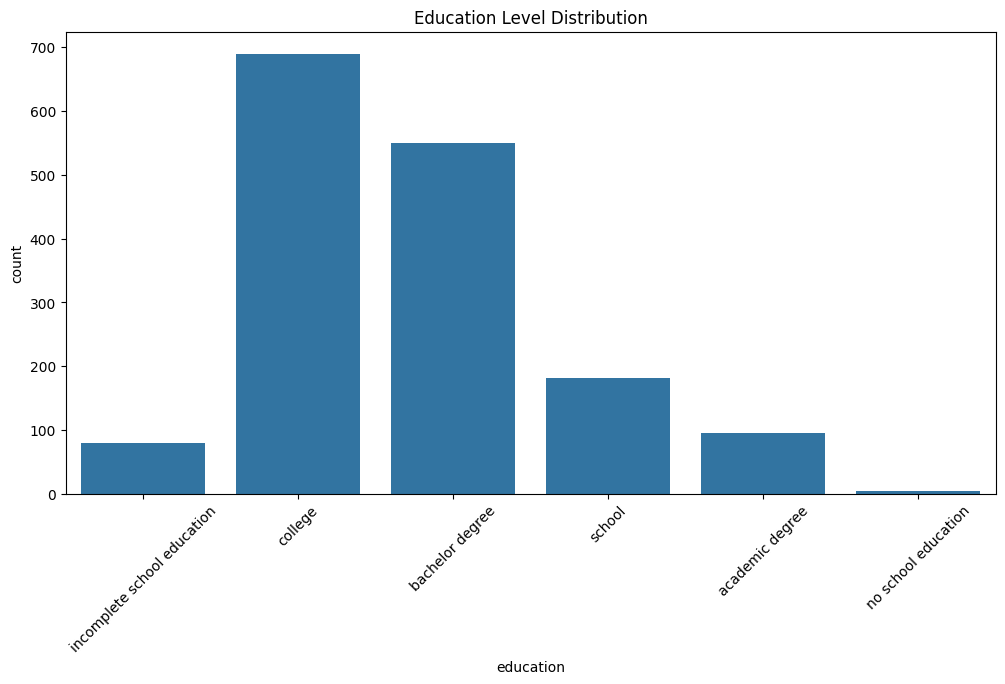

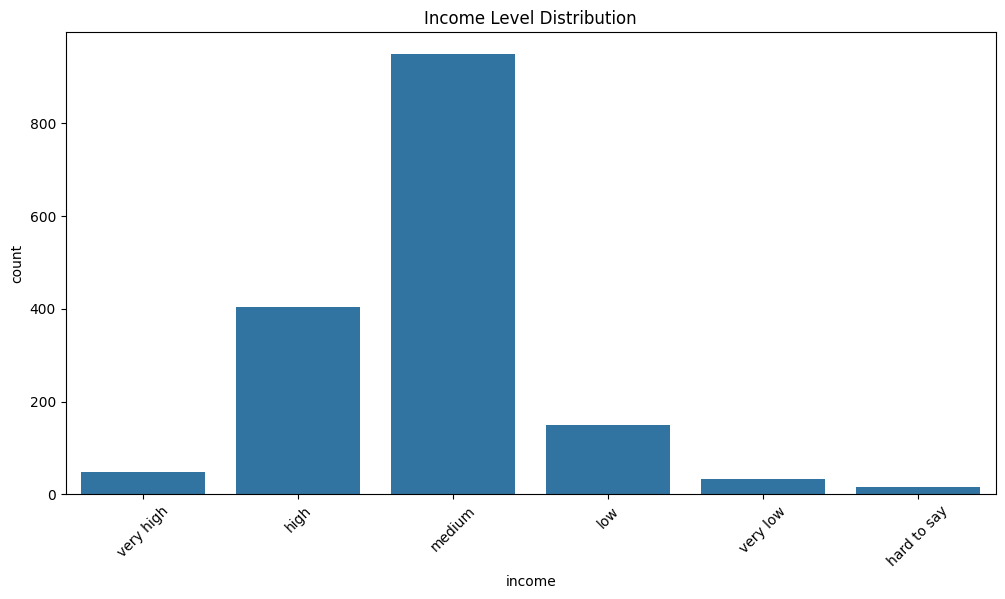

In [34]:
# Education level distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

# Income level distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='income')
plt.title('Income Level Distribution')
plt.xticks(rotation=45)
plt.show()

###Vote intention analysis

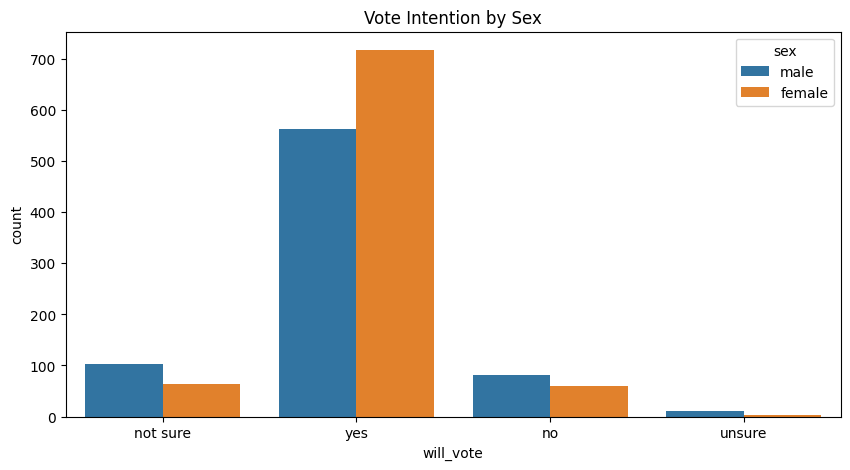

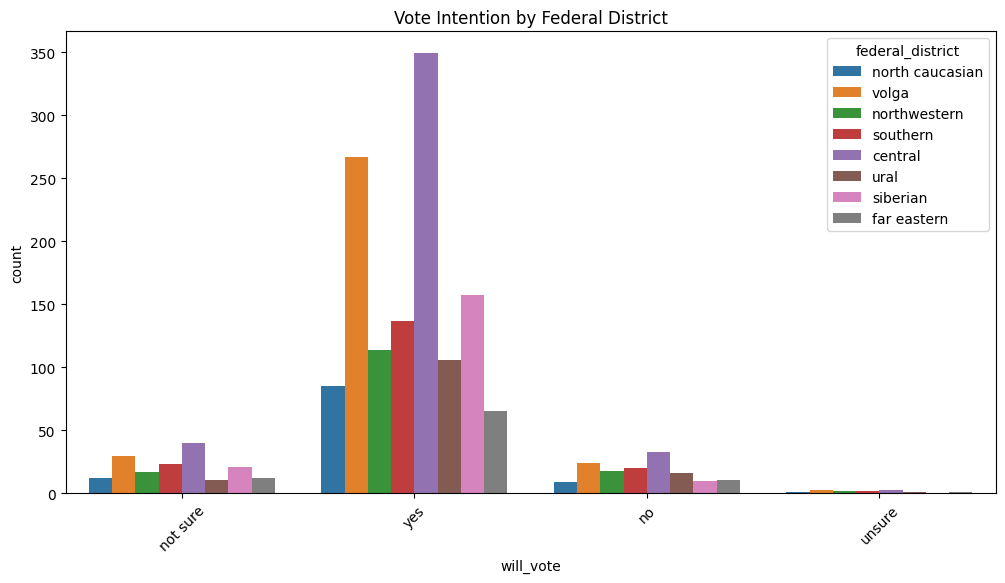

In [35]:
# Vote intention by sex
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='will_vote', hue='sex')
plt.title('Vote Intention by Sex')
plt.show()

# Vote intention by federal district
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='will_vote', hue='federal_district')
plt.title('Vote Intention by Federal District')
plt.xticks(rotation=45)
plt.show()